In [51]:
from sklearn.datasets import load_breast_cancer

In [52]:
data = load_breast_cancer()

In [53]:
X = data['data']
y = data['target']
feature_names = data['feature_names']
class_names = data['target_names']

In [54]:
X.shape

(569, 30)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 123)

In [57]:
X_train.shape

(426, 30)

In [58]:
X_test.shape

(143, 30)

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [62]:
params = [
    {
        'kernel' : ['linear'],
        'C' : [0.01, 0.1, 1, 10]
    },
    {
        'kernel' : ['rbf'],
        'C' : [0.01, 0.1, 1, 10],
        'gamma' : [0.01, 0.1, 1, 10]
    }
]

In [63]:
gs = GridSearchCV(SVC(), param_grid = params, scoring = 'accuracy', cv = 3, verbose = 5)  
                                              # scoring govori gs-u na koji nacin ocenjuje kvalitet modela
                                              

In [64]:
gs.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END .............C=0.01, kernel=linear;, score=0.951 total time=   0.0s
[CV 2/3] END .............C=0.01, kernel=linear;, score=0.944 total time=   0.0s
[CV 3/3] END .............C=0.01, kernel=linear;, score=0.972 total time=   0.0s
[CV 1/3] END ..............C=0.1, kernel=linear;, score=0.972 total time=   0.0s
[CV 2/3] END ..............C=0.1, kernel=linear;, score=0.972 total time=   0.0s
[CV 3/3] END ..............C=0.1, kernel=linear;, score=0.993 total time=   0.0s
[CV 1/3] END ................C=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 2/3] END ................C=1, kernel=linear;, score=0.979 total time=   0.0s
[CV 3/3] END ................C=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 1/3] END ...............C=10, kernel=linear;, score=0.951 total time=   0.0s
[CV 2/3] END ...............C=10, kernel=linear;, score=0.972 total time=   0.0s
[CV 3/3] END ...............C=10, kernel=linear;

,estimator,SVC()
,param_grid,"[{'C': [0.01, 0.1, ...], 'kernel': ['linear']}, {'C': [0.01, 0.1, ...], 'gamma': [0.01, 0.1, ...], 'kernel': ['rbf']}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,5
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [65]:
gs.best_params_

{'C': 1, 'kernel': 'linear'}

In [66]:
gs.best_score_

np.float64(0.983568075117371)

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [68]:
y_pred =  gs.best_estimator_.predict(X_test)

In [69]:
accuracy_score(y_test, y_pred)

0.965034965034965

In [70]:
import pandas as pd

In [71]:
pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['B', 'M'], columns = ['B', 'M'])

,B,M
B,49,4
M,1,89


In [72]:
f1_score(y_test, y_pred)

0.9726775956284153

In [73]:
import numpy as np

In [74]:
num_instances = 1000
X = np.random.uniform(low = -1, high = 1, size = (num_instances, 2))
X.shape

(1000, 2)

In [75]:
def f(x, y):
    return x**2 + y**2 <= 0.5

In [76]:
y = f(X[:, 0], X[:, 1])

In [77]:
from matplotlib import pyplot as plt

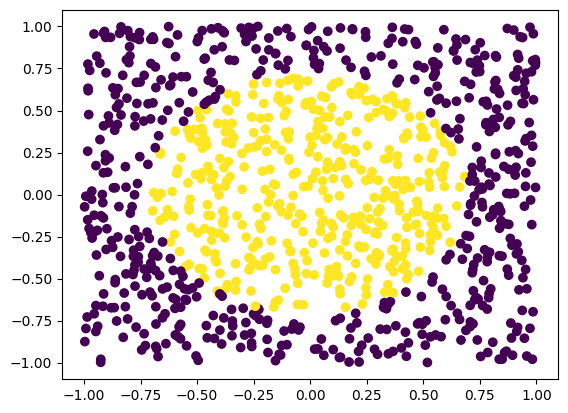

In [78]:
_ = plt.scatter(X[:, 0], X[:, 1], c = y)

In [79]:
model = SVC(kernel = 'linear')

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 123)

In [81]:
model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [82]:
accuracy_score(y_train, model.predict(X_train))

0.584

In [83]:
accuracy_score(y_test, model.predict(X_test))

0.584

In [84]:
model = SVC(kernel = 'rbf')

In [85]:
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [86]:
accuracy_score(y_train, model.predict(X_train))

0.9893333333333333

In [87]:
accuracy_score(y_test, model.predict(X_test))

0.988

In [88]:
print("Broj potpornih vektora za svaku od klasa:")
print(model.n_support_)
print("Indeksi instanci koje su potporni vektori:")
print(model.support_)
print("Sami potporni vektori:")
print(model.support_vectors_)

Broj potpornih vektora za svaku od klasa:
[85 83]
Indeksi instanci koje su potporni vektori:
[ 10  11  34  46  56  60  67  76  79  82  92  96  99 113 137 141 153 159
 165 185 195 207 211 212 222 237 239 268 272 285 299 301 306 312 317 322
 333 339 346 347 353 358 361 368 375 376 378 381 390 401 424 427 436 450
 463 467 478 480 487 491 495 503 505 506 510 521 533 534 538 539 578 596
 617 638 647 652 659 663 671 672 673 679 703 722 737   4  16  17  37  38
  49  62  83  91 111 112 131 132 156 158 167 172 174 182 183 187 189 190
 191 203 221 238 244 246 253 263 274 296 302 308 313 318 324 326 327 366
 387 403 413 423 426 432 447 449 460 469 476 477 508 514 518 519 520 524
 527 529 552 554 567 572 581 604 606 613 622 633 665 666 667 669 678 690
 696 697 704 728 729 735]
Sami potporni vektori:
[[ 0.60016383  0.39275855]
 [ 0.61779389 -0.35652938]
 [ 0.68924758 -0.24397797]
 [-0.60545387 -0.45124759]
 [ 0.65752818  0.33109572]
 [-0.45866738  0.55026606]
 [-0.4681046   0.53738307]
 [-0.5383028

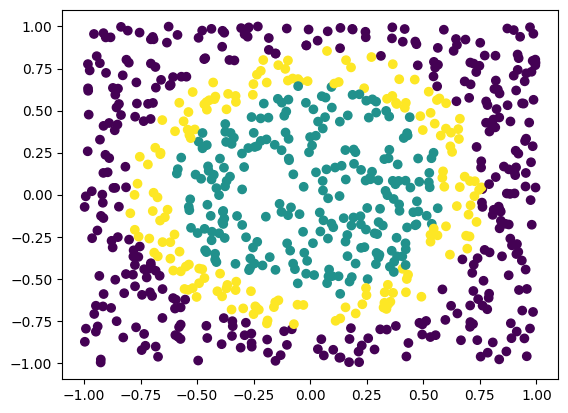

In [93]:
color = y_train.astype(int)
color[model.support_] = 2
plt.scatter(X_train[:, 0], X_train[:, 1], c = color)
plt.show()

In [94]:
def plot_3d(x, y, z, c, elev, azim):
    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')
    ax.view_init(elev = elev, azim = azim)
    ax.scatter(x, y, z, c = c)
    plt.show()

In [95]:
def visualize_rbf(X, y, gamma = 1):
    z = np.exp(-gamma * (X**2).sum(1))
    plot_3d(X[:,0], X[:,1], z, c = y, elev = 0, azim = 30)

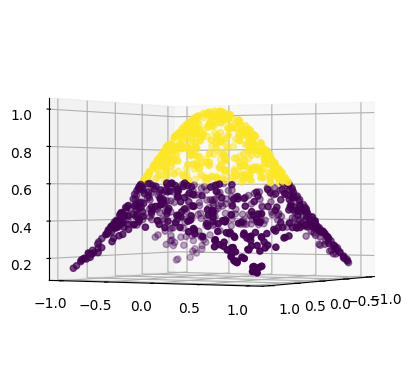

In [96]:
visualize_rbf(X, y)

In [97]:
def visualize_poly(X, y):
    plot_3d(X[:,0]**2, np.sqrt(2)*X[:,0]*X[:,1], X[:,1]**2, c = y, elev = 0, azim = 60)

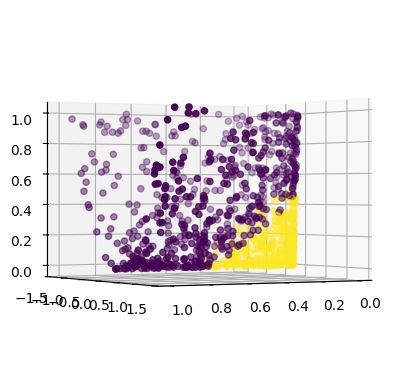

In [98]:
visualize_poly(X, y)